# Projeto Petrobrás

## Dataset
A base de dados é composta por dados
reais obtidos através de sensores de
vazão e pressão. O feature Resistência é
a razão entre pressão e vazão
instantânea, enquanto a Campanha é a
integração do produto entre vazão e
tempo.

O comportamento do filtro de carbono
ativado foi classificado em três
categorias: “normal”, “alerta” e
“anômalo”.

## Desafio

Desenvolver uma aplicação que seja capaz de
realizar a classificação do ciclo, como sendo:
“normal”, “alerta” ou “anômalo”. Utilizando
como entradas os features “campanha” e/ou
“resistência”.

*   Com os dados de teste, ap.: matriz de confusão,
acurácia, score F1;
*   Com os dados de treinamento, ap.: plotar a
curva de aprendizado


## Bibliotecas

In [1]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split, learning_curve
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import confusion_matrix, accuracy_score, f1_score, ConfusionMatrixDisplay
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

## Pré-processamento

In [3]:
# Carregar o dataset
df = pd.read_csv('dataset_carbon_filter.csv')

# Informações sobre o dataset
print(df.head(), '\n')
print(df.info(), '\n')
print(df.describe(), '\n')

# Verificar os nomes das colunas
print("Nomes das colunas:", df.columns)

   Unnamed: 0  campaign_E  resistance_E  cycle_E target_cycle
0           0    7.901872      0.009634        0       normal
1           1   16.027108      0.009480        0       normal
2           2   24.227011      0.009503        0       normal
3           3   32.492282      0.009537        0       normal
4           4   40.774930      0.009626        0       normal 

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17268 entries, 0 to 17267
Data columns (total 5 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Unnamed: 0    17268 non-null  int64  
 1   campaign_E    17268 non-null  float64
 2   resistance_E  17268 non-null  float64
 3   cycle_E       17268 non-null  int64  
 4   target_cycle  17268 non-null  object 
dtypes: float64(2), int64(2), object(1)
memory usage: 674.7+ KB
None 

         Unnamed: 0    campaign_E  resistance_E       cycle_E
count  17268.000000  17268.000000  17268.000000  17268.000000
mean   23111.483264   

Unnamed: 0      0
campaign_E      0
resistance_E    0
cycle_E         0
target_cycle    0
dtype: int64 

target_cycle
normal     10632
alert       4913
anomaly     1723
Name: count, dtype: int64 

target_cycle
normal     0.615705
alert      0.284515
anomaly    0.099780
Name: proportion, dtype: float64 

Axes(0.125,0.11;0.775x0.77) 



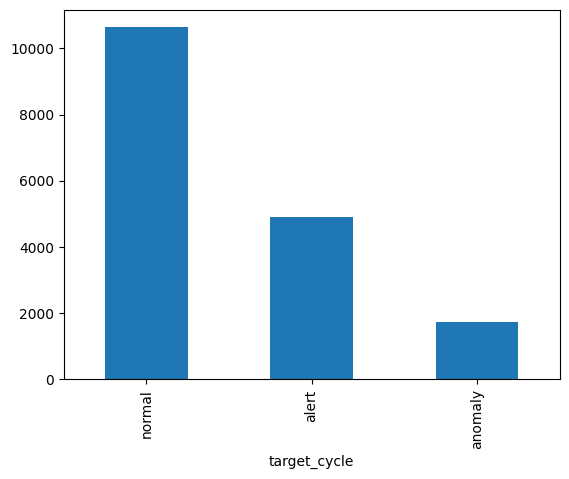

In [4]:
# Pré-processamento dos dados
# Verificar se há valores ausentes
print(df.isnull().sum(), '\n')

# Verificar a distribuição da classe target
print(df['target_cycle'].value_counts(), '\n')
print(df['target_cycle'].value_counts(normalize=True), '\n')
print(df['target_cycle'].value_counts().plot(kind='bar'), '\n')

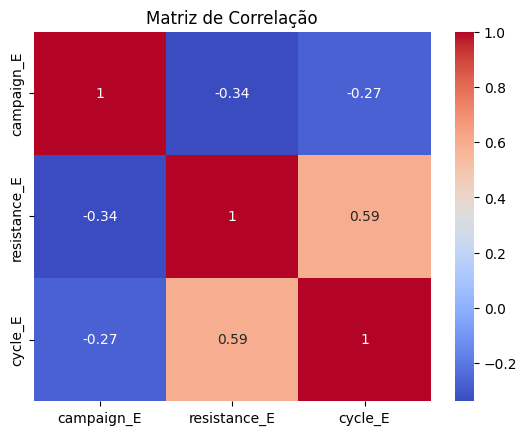

In [5]:
# Análise de correlação
numeric_features = df.select_dtypes(include=[np.number]).iloc[:, 1:]
correlation_matrix = numeric_features.corr()
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm')
plt.title('Matriz de Correlação')
plt.show()

## Separação dos dados

In [20]:
# Separar as features e o target
X = df[['campaign_E', 'resistance_E']]
y = df['target_cycle']

# Dividir os dados em treinamento e teste
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Escalar os dados
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

## Treinamento usando Random Forest

In [21]:
model = RandomForestClassifier(random_state=42)
model.fit(X_train, y_train)

RandomForestClassifier(random_state=42)

Acurácia: 0.9793476162902914
F1-Score: 0.9794172178292144


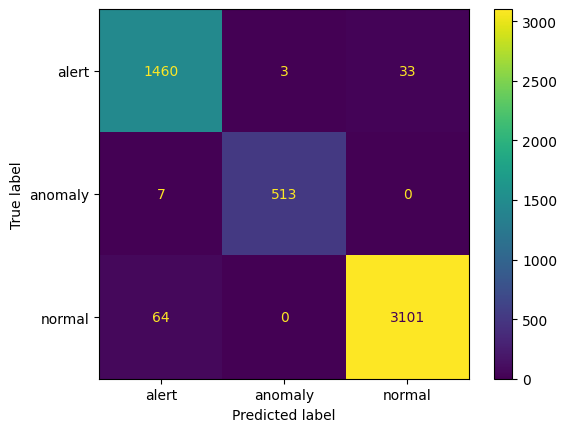

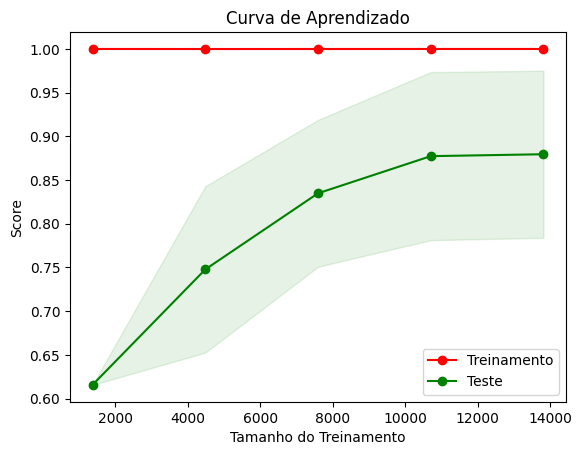

In [22]:
# Avaliação do modelo
y_pred = model.predict(X_test)
cm = confusion_matrix(y_test, y_pred)
accuracy = accuracy_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred, average='weighted')

#print('Matriz de Confusão:')
#print(cm)
print('Acurácia:', accuracy)
print('F1-Score:', f1)

# Plotar matriz de confusão
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=model.classes_)
disp.plot()
plt.show()

# Plotar a curva de aprendizado
train_sizes, train_scores, test_scores = learning_curve(model, X, y, cv=5, n_jobs=-1, train_sizes=np.linspace(0.1, 1.0, 5))

train_scores_mean = np.mean(train_scores, axis=1)
train_scores_std = np.std(train_scores, axis=1)
test_scores_mean = np.mean(test_scores, axis=1)
test_scores_std = np.std(test_scores, axis=1)

plt.figure()
plt.title('Curva de Aprendizado')
plt.xlabel('Tamanho do Treinamento')
plt.ylabel('Score')

# Curva de aprendizado para o conjunto de treinamento
plt.fill_between(train_sizes, train_scores_mean - train_scores_std, train_scores_mean + train_scores_std, alpha=0.1, color="r")
plt.plot(train_sizes, train_scores_mean, 'o-', color="r", label="Treinamento")

# Curva de aprendizado para o conjunto de teste
plt.fill_between(train_sizes, test_scores_mean - test_scores_std, test_scores_mean + test_scores_std, alpha=0.1, color="g")
plt.plot(train_sizes, test_scores_mean, 'o-', color="g", label="Teste")

plt.legend(loc="best")
plt.show()

# Por a curva de aprendizado do treinamento estar tao proxima de 1, pensei que poderia estar causando overfiting, então vou usar o GridSearch para procurar os melhores parâmetros.
# Valores Random Forest Base
# Acurácia: 0.9793476162902914
# F1-Score: 0.9794172178292144

## Grid Search

Melhores parâmetros encontrados: {'max_depth': 15, 'min_samples_leaf': 1, 'min_samples_split': 2, 'n_estimators': 100}
Matriz de Confusão:
[[1464    3   29]
 [   7  513    0]
 [  68    0 3097]]
Acurácia: 0.9793476162902914
F1-Score: 0.979432159327467


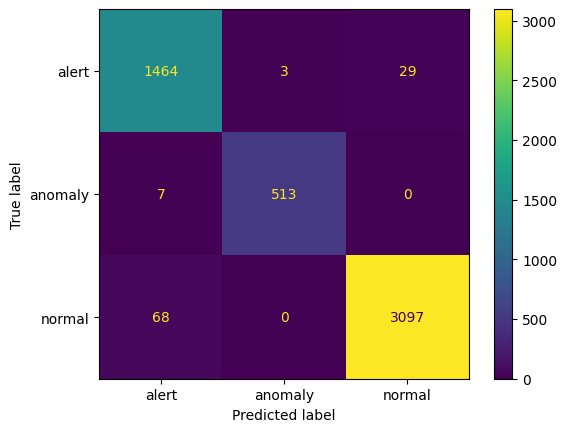

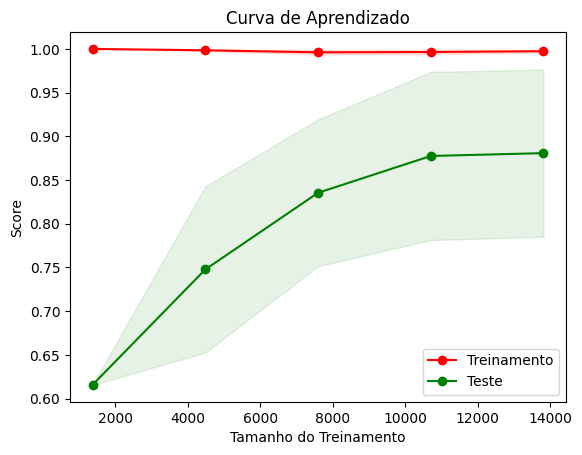

In [23]:
from sklearn.model_selection import GridSearchCV

# Parâmetros para o Grid Search
param_grid = {
    'n_estimators': [100, 200],
    'max_depth': [5, 10, 15],
    'min_samples_split': [2, 10, 20],
    'min_samples_leaf': [1, 4, 8]
}

# Configuração do Grid Search
grid_search = GridSearchCV(RandomForestClassifier(random_state=42), param_grid, cv=5, scoring='accuracy', n_jobs=-1)
grid_search.fit(X_train, y_train)

# Melhor conjunto de hiperparâmetros
best_params = grid_search.best_params_
print("Melhores parâmetros encontrados:", best_params)

# Treinamento com os melhores parâmetros
best_model = grid_search.best_estimator_
best_model.fit(X_train, y_train)

# Avaliação do modelo
y_pred = best_model.predict(X_test)
cm = confusion_matrix(y_test, y_pred)
accuracy = accuracy_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred, average='weighted')

print('Matriz de Confusão:')
print(cm)
print('Acurácia:', accuracy)
print('F1-Score:', f1)

# Plotar matriz de confusão
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=best_model.classes_)
disp.plot()
plt.show()

# Plotar a curva de aprendizado
train_sizes, train_scores, test_scores = learning_curve(best_model, X, y, cv=5, n_jobs=-1, train_sizes=np.linspace(0.1, 1.0, 5))

train_scores_mean = np.mean(train_scores, axis=1)
train_scores_std = np.std(train_scores, axis=1)
test_scores_mean = np.mean(test_scores, axis=1)
test_scores_std = np.std(test_scores, axis=1)

plt.figure()
plt.title('Curva de Aprendizado')
plt.xlabel('Tamanho do Treinamento')
plt.ylabel('Score')

# Curva de aprendizado para o conjunto de treinamento
plt.fill_between(train_sizes, train_scores_mean - train_scores_std, train_scores_mean + train_scores_std, alpha=0.1, color="r")
plt.plot(train_sizes, train_scores_mean, 'o-', color="r", label="Treinamento")

# Curva de aprendizado para o conjunto de teste
plt.fill_between(train_sizes, test_scores_mean - test_scores_std, test_scores_mean + test_scores_std, alpha=0.1, color="g")
plt.plot(train_sizes, test_scores_mean, 'o-', color="g", label="Teste")

plt.legend(loc="best")
plt.show()

# Melhores parâmetros encontrados: {'max_depth': 15, 'min_samples_leaf': 1, 'min_samples_split': 2, 'n_estimators': 100}

# Mesmo com esses parâmetros, a Acurácia e o F1-Score ficaram melhoraram em relação aos valores obtidos com o RandomForest com parâmetros base.
# Acurácia: 0.9793476162902914
# F1-Score: 0.979432159327467